# Homework 1

(a)

In [1]:
import pandas as pd
import os.path
import shutil

shutil.move(os.path.join(r'../data/vertebral_column_data', 'column_2C.dat'), os.getcwd())
df = pd.read_table('column_2C.dat', sep = r'\s+', names = ['Pelvic_Incidence', 'Pelvic_Tilt', 'Lumbar_Lordosis_Angle',
                                                           'Sacral_Slope', 'Pelvic_Radius', 'Grade_of_SL', 'Class'])

df['Class'] = df['Class'].replace(['NO','AB'],['0','1'])
df = df.astype({'Class': 'int'})

In [2]:
df

,Pelvic_Incidence,Pelvic_Tilt,Lumbar_Lordosis_Angle,Sacral_Slope,Pelvic_Radius,Grade_of_SL,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


(b) i.

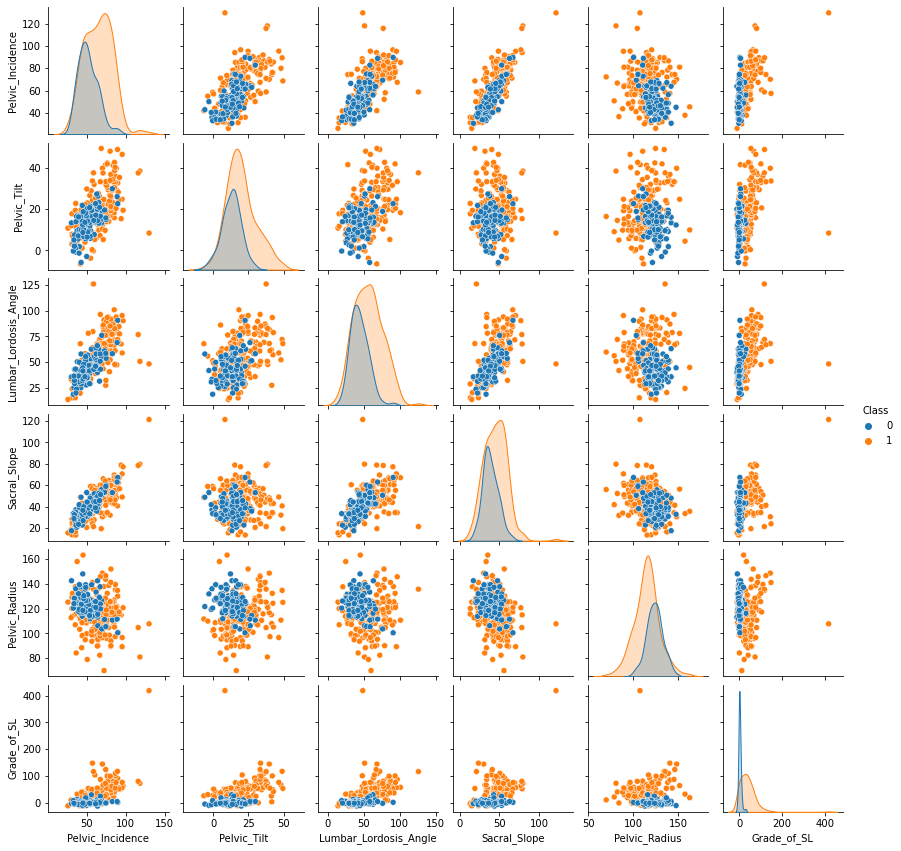

In [3]:
import seaborn as sns
sns.pairplot(df, vars = ['Pelvic_Incidence', 'Pelvic_Tilt', 'Lumbar_Lordosis_Angle', 'Sacral_Slope',
                         'Pelvic_Radius', 'Grade_of_SL'], diag_kind = 'kde', height = 2, hue = 'Class');

(b) ii.

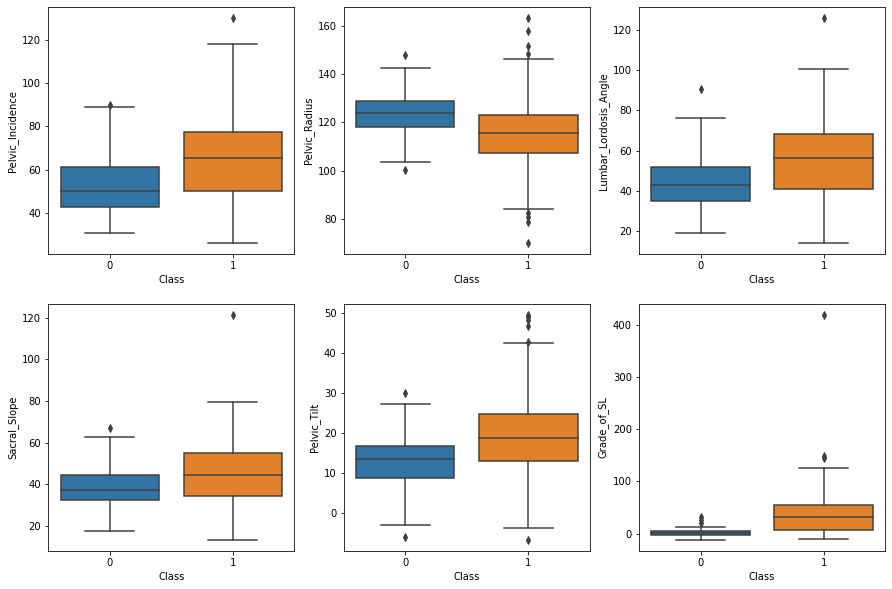

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15,10)
names = ['Pelvic_Incidence', 'Pelvic_Tilt', 'Lumbar_Lordosis_Angle',
         'Sacral_Slope', 'Pelvic_Radius', 'Grade_of_SL']

for i,t in enumerate(names):
    sns.boxplot(x = 'Class', y = t, data = df, ax = axes[i % 2, i % 3]);

(b) iii.

In [5]:
train_set = df[df['Class'] == 0][:70]
train_set = train_set.append(df[df['Class'] == 1][:140])

test_set = df.drop(train_set.index)

(c) i.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')

(c) ii.

In [7]:
# starting a tally of training error for part (f), appending train MSE from every for loop
train_error_main = list()

The most suitable k among those values is 4


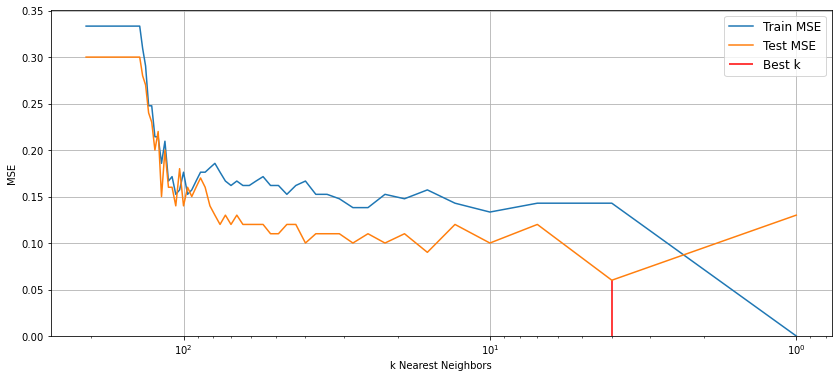

In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error

# get train/test features and label
y_train = train_set.Class
x_train = train_set.drop(['Class'], axis = 1)
y_test = test_set.Class
x_test = test_set.drop(['Class'], axis = 1)

# compute train and test errors for k ∈ {208, 205, ... , 7, 4, 1}
params = np.arange(208, 0, -3)
knn = KNeighborsClassifier(metric = 'euclidean')
train_errors = list()
test_errors = list()

for k in params:
    knn.set_params(n_neighbors = k)
    knn.fit(x_train, y_train)
    train_errors.append(mean_squared_error(knn.predict(x_train), y_train))
    test_errors.append(mean_squared_error(knn.predict(x_test), y_test))
    train_error_main.append(mean_squared_error(knn.predict(x_train), y_train))

# get best k
k_index = np.argmin(test_errors)
opt_k = params[k_index]

# plot results
plt.figure(figsize = (14,6))
plt.semilogx(params, train_errors)
plt.semilogx(params, test_errors)
plt.xlabel('k Nearest Neighbors')
plt.ylabel('MSE')
plt.vlines(opt_k, plt.ylim()[0], np.min(test_errors), color = 'r')
plt.legend(['Train MSE', 'Test MSE', 'Best k'], fontsize = 'large')
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(bottom = 0)
plt.draw()
plt.grid()

print('The most suitable k among those values is %s' % opt_k)

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

knn.set_params(n_neighbors = opt_k)
knn.fit(x_train, y_train)

mat = confusion_matrix(y_test, knn.predict(x_test))
cm = pd.DataFrame(mat, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES'])
f1 = f1_score(y_test, knn.predict(x_test))

print(cm, '\n')
print('True Positive Rate: ', '{0:.2%}'.format(mat[1,1]/(mat[1,1]+mat[1,0])))
print('True Negative Rate: ', '{0:.2%}'.format(mat[0,0]/(mat[0,0]+mat[0,1])))
print('Precision: ', '{0:.2%}'.format(mat[1,1]/(mat[1,1]+mat[0,1])))
print('F1 Score: ', '{0:.2%}'.format(f1))

             Predicted: NO  Predicted: YES
Actual: NO              25               5
Actual: YES              1              69 

True Positive Rate:  98.57%
True Negative Rate:  83.33%
Precision:  93.24%
F1 Score:  95.83%


(c) iii.

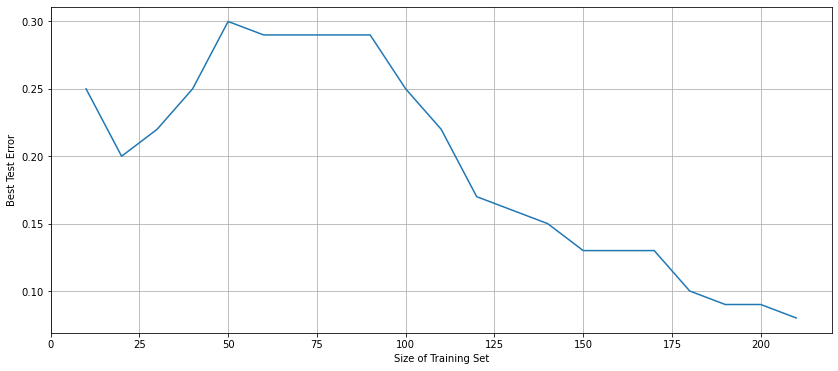

In [10]:
train_sizes = np.arange(10, 211, 10)
best_test_error = list()

for n in train_sizes:
    
    # update training set size based on N
    train_set_n = train_set[train_set['Class'] == 0][:int(np.floor(n/3))]
    train_set_n = train_set_n.append(train_set[train_set['Class'] == 1][:int(n-np.floor(n/3))])
    y_train_n = train_set_n.Class
    x_train_n = train_set_n.drop(['Class'], axis = 1)
    
    # compute test errors for k nearest neighbors with training set size of N
    params = np.arange(1, n, 5)
    knn = KNeighborsClassifier(metric = 'euclidean')
    test_errors_n = list()
    
    for k in params:
        knn.set_params(n_neighbors = k)
        knn.fit(x_train_n, y_train_n)
        test_errors_n.append(mean_squared_error(knn.predict(x_test), y_test))
        train_error_main.append(mean_squared_error(knn.predict(x_train), y_train))
        
    # get best test error    
    best_test_error.append(np.min(test_errors_n))
    
# plot results
plt.figure(figsize = (14,6))
plt.plot(train_sizes, best_test_error)
plt.xlabel('Size of Training Set')
plt.ylabel('Best Test Error')
plt.grid()

(d) i.

In [11]:
# A
params = np.arange(1, 197, 5)
test_errors_A = list()
index_A = list()
knn = KNeighborsClassifier(metric = 'manhattan')

for k in params:
    knn.set_params(n_neighbors = k)
    knn.fit(x_train, y_train)
    test_errors_A.append(mean_squared_error(knn.predict(x_test), y_test, squared = False)) 
    index_A.append(k)
    train_error_main.append(mean_squared_error(knn.predict(x_train), y_train))
    
best_RMSE_A = np.min(test_errors_A)
best_k_A = params[test_errors_A.index(best_RMSE_A)]
best_MSE_A = round(best_RMSE_A**2,2)

In [12]:
# B
z = np.arange(0.1, 1.1, 0.1)
ps = 10**z

test_errors_B = list()
index_B = list()
knn = KNeighborsClassifier(metric = 'minkowski')

for p in ps:
    
    knn.set_params(n_neighbors = best_k_A, **{'p': p})
    knn.fit(x_train, y_train)
    test_errors_B.append(mean_squared_error(knn.predict(x_test), y_test))
    index_B.append(p)
    train_error_main.append(mean_squared_error(knn.predict(x_train), y_train))

best_MSE_B = np.min(test_errors_B)
best_log10p = z[test_errors_B.index(best_MSE_B)]

In [13]:
# C
params = np.arange(1, 197, 5)
test_errors_C = list()
index_C = list()
knn = KNeighborsClassifier(metric = 'chebyshev')

for k in params:
    knn.set_params(n_neighbors = k)
    knn.fit(x_train, y_train)
    test_errors_C.append(mean_squared_error(knn.predict(x_test), y_test)) 
    index_C.append(k)
    train_error_main.append(mean_squared_error(knn.predict(x_train), y_train))

best_MSE_C = np.min(test_errors_C)
best_k_C = params[test_errors_C.index(best_MSE_C)]

(d) ii.

In [14]:
# ingoring FutureWarning about V/VI in mahalanobis metric
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

v = pd.DataFrame.cov(x_train)
params = np.arange(1, 197, 5)
test_errors_d2 = list()
index_d2 = list()
knn = KNeighborsClassifier(metric = 'mahalanobis')

for k in params:
    knn.set_params(n_neighbors = k, metric_params = {'V':v})
    knn.fit(x_train, y_train)
    test_errors_d2.append(mean_squared_error(knn.predict(x_test), y_test)) 
    index_d2.append(k)
    train_error_main.append(mean_squared_error(knn.predict(x_train), y_train))

best_MSE_d2 = np.min(test_errors_d2)
best_k_d2 = params[test_errors_d2.index(best_MSE_d2)]

In [15]:
# summary
data = [[best_MSE_A, best_k_A, 'N/A'], [best_MSE_B, best_k_A, best_log10p],
       [best_MSE_C, best_k_C, 'N/A'], [best_MSE_d2, best_k_d2, 'N/A']]

minkowski_scores = pd.DataFrame(data,
                                index = ['Manhattan', 'Minkowski w/ Best log10(p)', 'Chebyshev', 'Mahalanobis'],
                                columns = ['Best Test MSE', 'Optimal k', 'Best log10(p)'] )
print(minkowski_scores)

                            Best Test MSE  Optimal k Best log10(p)
Manhattan                            0.11          6           N/A
Minkowski w/ Best log10(p)           0.06          6           0.6
Chebyshev                            0.08         16           N/A
Mahalanobis                          0.17          1           N/A


(e)

In [16]:
params = np.arange(1, 197, 5)

# euclidean
test_errors_e = list()
index_e = list()
knn = KNeighborsClassifier(metric = 'euclidean')

for k in params:
    knn.set_params(n_neighbors = k, weights = 'distance')
    knn.fit(x_train, y_train)
    test_errors_e.append(mean_squared_error(knn.predict(x_test), y_test)) 
    index_e.append(k)
    train_error_main.append(mean_squared_error(knn.predict(x_train), y_train))
    
best_MSE_e = np.min(test_errors_e)
best_k_e = params[test_errors_e.index(best_MSE_e)]
    
# manhattan
test_errors_m = list()
index_m = list()
knn = KNeighborsClassifier(metric = 'manhattan')

for k in params:
    knn.set_params(n_neighbors = k, weights = 'distance')
    knn.fit(x_train, y_train)
    test_errors_m.append(mean_squared_error(knn.predict(x_test), y_test)) 
    index_m.append(k)
    train_error_main.append(mean_squared_error(knn.predict(x_train), y_train))

best_MSE_m = np.min(test_errors_m)
best_k_m = params[test_errors_m.index(best_MSE_m)]

# chebyshev
test_errors_c = list()
index_c = list()
knn = KNeighborsClassifier(metric = 'chebyshev')

for k in params:
    knn.set_params(n_neighbors = k, weights = 'distance')
    knn.fit(x_train, y_train)
    test_errors_c.append(mean_squared_error(knn.predict(x_test), y_test)) 
    index_c.append(k)
    train_error_main.append(mean_squared_error(knn.predict(x_train), y_train))
    
best_MSE_c = np.min(test_errors_c)
best_k_c = params[test_errors_c.index(best_MSE_c)]

In [17]:
# summary
data = [[best_MSE_e, best_k_e], [best_MSE_m, best_k_m], [best_MSE_c, best_k_c]]
weighted_scores = pd.DataFrame(data,
                                index = ['Euclidean', 'Manhattan', 'Chebyshev'],
                                columns = ['Best Test MSE', 'Optimal k'] )
print(weighted_scores)

           Best Test MSE  Optimal k
Euclidean           0.10          6
Manhattan           0.10         26
Chebyshev           0.11         16


(f)

In [18]:
lowest_tr_main = np.min(train_error_main)
print('The lowest training error rate I achieved in this homework is', lowest_tr_main)

The lowest training error rate I achieved in this homework is 0.0
